In [136]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

# load general packages
import numpy as np
import matplotlib.pyplot as plt
from consav.linear_interp import interp_4d

# load modules related to this exercise
from educationmodel import EducationModel
import estimate as est 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [137]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

In [138]:
model = EducationModel() # Define the model
model.solve() # Solve the model

# Redefine
sol = model.sol 
par = model.par 


## Estimate the parameters

In [139]:
estimate_ = est.estimate_class() # define the estimate function
family_data, decision_data = estimate_.read_data() # Read data

In [140]:
print(f'Max util_school: {util_school.max()}, Min util_school: {util_school.min()}')
print(f'Max ability_wage: {ability_wage.max()}, Min ability_wage: {ability_wage.min()}')

NameError: name 'util_school' is not defined

In [ ]:
delta7= np.linspace(-5,5,5)
log_lik = np.nan + np.zeros(5)

In [ ]:
# Problemet er her, at vi rammer noget negativt. 
for i in range(5):
    pnames = ['delta7']
    theta = np.array([delta7[i]])
    log_lik[i]=estimate_.ll(theta,model, family_data, decision_data, pnames)

delta7 -5.0


KeyboardInterrupt: 

In [ ]:
model = est.updatepar(model,pnames,theta)

AttributeError: module 'estimate' has no attribute 'updatepar'

In [ ]:
def updatepar(par,parnames, parvals):
    """ Update parameters """
    for i,parname in enumerate(parnames):
        parval = parvals[i]
        setattr(par,parname,parval)
    return par

In [ ]:
updatepar(model.par, pnames, [7])

namespace(T=10,
          simT=10,
          zeta=0.0749,
          beta=0.97,
          Nfix=4,
          simN=400,
          N=1710,
          delta0=0.0205,
          delta1=-0.008,
          delta2=0.0017,
          delta3=-0.0156,
          delta4=0.0387,
          delta5=-0.0618,
          delta6=-0.0412,
          gamma0_w=0.0106,
          gamma1_w=-0.0144,
          gamma2_w=0.0012,
          gamma3_w=-0.0084,
          gamma4_w=0.0225,
          gamma5_w=-0.0591,
          gamma6_w=-0.0363,
          delta7=7,
          delta8=0.0001,
          kappa1=-0.0258,
          kappa2=0.0001,
          kappa3=-0.0146,
          kappa4=0.0001,
          phi1=0.7,
          phi2=-0.004,
          phi3=0.0877,
          phi4=-0.003,
          school_time_min=6,
          school_time_max=20,
          Nst=15,
          experience_min=0,
          experience_max=17,
          Ne=18,
          nuxi_tilde_1=-2.9693,
          nuxi_tilde_2=-2.7838,
          nuxi_tilde_3=-3.2766,
          n

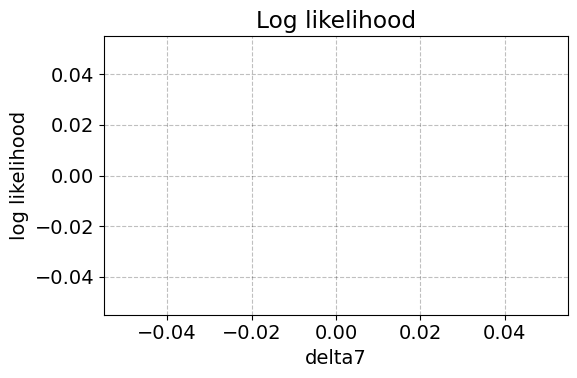

In [ ]:
fig = plt.figure(figsize=(6,4),dpi=100)

ax = fig.add_subplot(1,1,1)
ax.set_title('Log likelihood')

ax.plot(delta7,log_lik)

ax.set_xlabel('delta7')
ax.set_ylabel('log likelihood')


fig.tight_layout()

In [ ]:
pnames = ['delta7']
bounds = [(None,None)]
theta0 = [0]

In [ ]:
estimate_.estimate(model, family_data, decision_data, pnames, theta0, bounds)

TypeError: estimate_class.estimate() takes 6 positional arguments but 7 were given

## Simulate Model

In [141]:
# Simulate model
model.simulate()
sim=model.sim

In [142]:
# Determining the different types
Type1 = np.where((sim.util_school_fix == 50) & (sim.abil_work_fix == 30),1,0) # Low utility school, low ability work
Type2 = np.where((sim.util_school_fix == 200) & (sim.abil_work_fix == 30),1,0) # High utility school, low ability work
Type3 = np.where((sim.util_school_fix == 50) & (sim.abil_work_fix == 120),1,0) # Low utility school, high ability work
Type4 = np.where((sim.util_school_fix == 200) & (sim.abil_work_fix == 120),1,0) # High utility school, high ability work


In [143]:
mean_school_vectors =[]
mean_interrupt_vectors =[]
mean_school_time_vectors = []
mean_wage_vectors = []
mean_experience_vectors = []

In [144]:
types = [Type1,Type2,Type3,Type4]
for s in types:
    i = np.where(s == 1)[0]

    mean_school = sim.school[i].mean(axis=0)
    mean_interrupt = sim.interrupt[i].mean(axis=0)
    mean_school_time = sim.school_time[i].mean(axis=0)
    mean_wage = np.nanmean(sim.wage[i],axis=0)
    mean_experience = np.nanmean(sim.experience[i],axis=0)
    mean_school_vectors.append(mean_school)
    mean_interrupt_vectors.append(mean_interrupt)
    mean_school_time_vectors.append(mean_school_time)
    mean_wage_vectors.append(mean_wage)
    mean_experience_vectors.append(mean_experience)


/var/folders/0d/9fxwhbm96fddwvy2wk2rxltc0000gn/T/ipykernel_20518/3719368034.py:8: RuntimeWarning: Mean of empty slice
  mean_wage = np.nanmean(sim.wage[i],axis=0)


In [149]:
plot_vectors = [mean_school_vectors, mean_school_time_vectors, mean_wage_vectors, mean_experience_vectors]
vector_names = ["Mean schooling dummy", "Mean school time", "Mean wage", "Mean experience"]

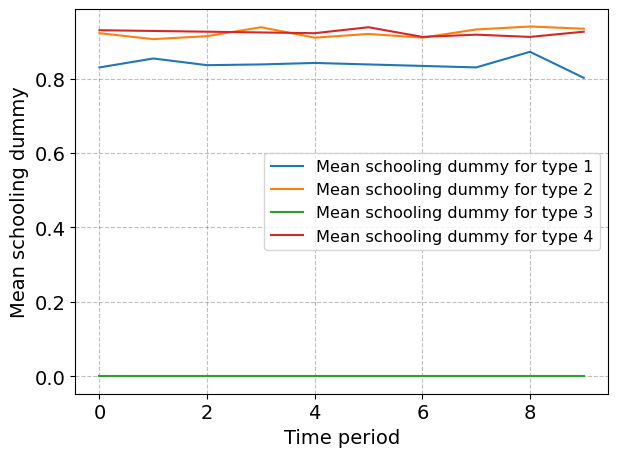

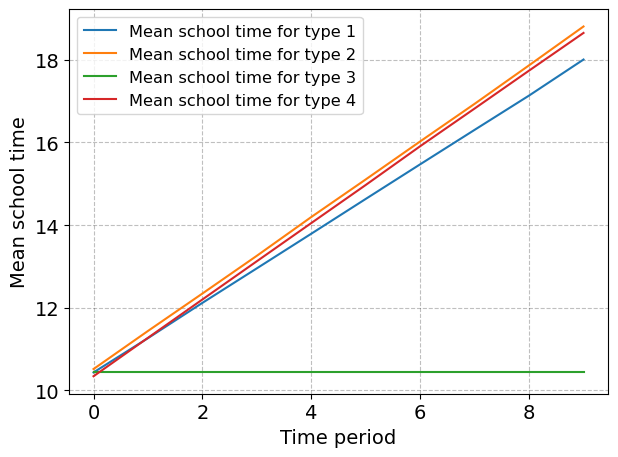

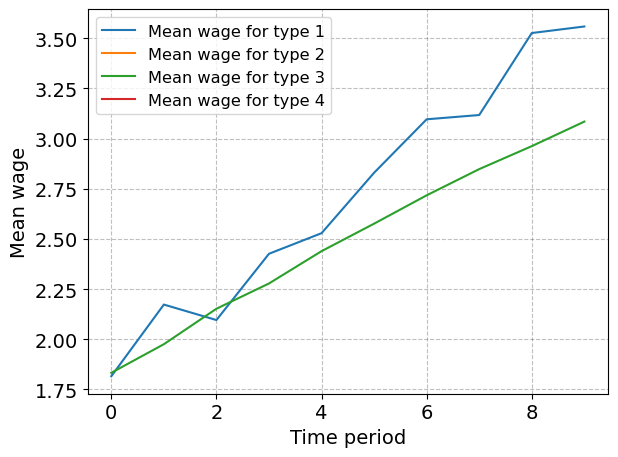

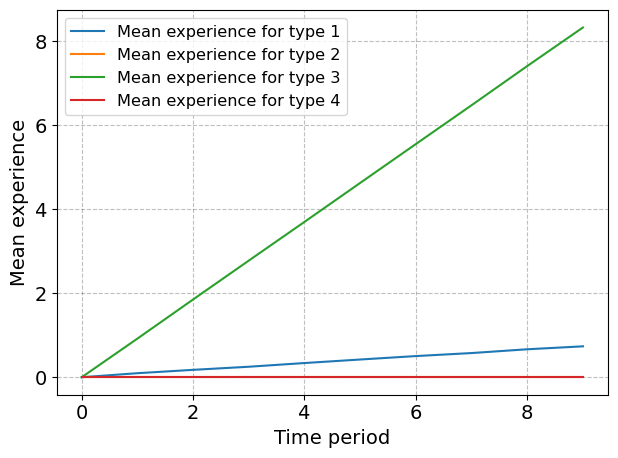

In [150]:
for vector, name in zip(plot_vectors, vector_names):
    for i in range(4):
        plt.plot(vector[i], label=f"{name} for type {i+1}")
    plt.legend(fontsize='small')
    plt.xlabel("Time period")
    plt.ylabel(name)
    plt.tight_layout()
    plt.savefig(f"{name}_for_type_{i+1}_over_time.png") # Save the figure
    plt.show()


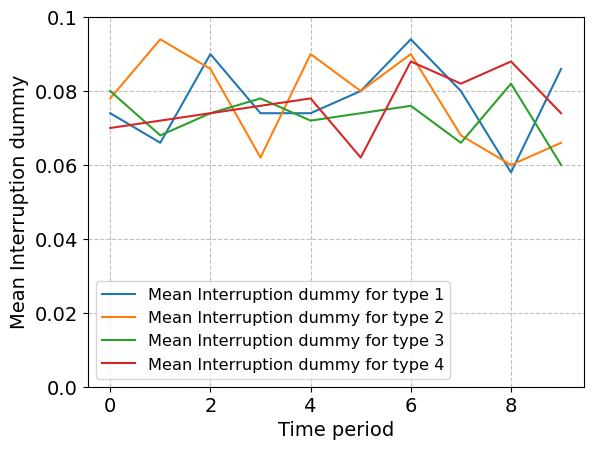

In [151]:
# Plot interruption choice for the different types    
for i in range(4):
    plt.plot(mean_interrupt_vectors[i], label=f"Mean Interruption dummy for type {i+1}")
plt.legend(fontsize='small')
plt.xlabel("Time period")
plt.ylabel('Mean Interruption dummy')
plt.yticks([0.0,0.02,0.04,0.06,0.08,0.1],['0.0','0.02','0.04','0.06','0.08','0.1'])
plt.savefig(f"Mean Interruption_for_type_{i+1}_over_time.png") # Save the figure
plt.show()